In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
x_plot = np.arange(0, 20)
y_plot = 1 + x_plot ** 2 + x_plot ** 3

max_degree = 5
features = ["$x$", *(f"$x^{i}$" for i in range(2, max_degree + 1))]

X_train = np.c_[*(x_plot ** i for i in range(1, max_degree + 1))]
y_train = y_plot

In [9]:
def z_score_normalization(X_matrix):
    features_mean = np.mean(X_matrix, axis = 0)
    features_std_dev = np.std(X_matrix, axis = 0)

    normalized_X_matrix = (X_matrix - features_mean) / features_std_dev
    return normalized_X_matrix

In [10]:
# Not used anywhere!
def linear_regression_model(X_set, W_set, b):
    return np.dot(W_set, X_set) + b

In [21]:
def get_errors(X_matrix, y_set, W_set, b):
    prediction_set = X_matrix @ W_set + b
    return prediction_set - y_set

In [22]:
def calculate_cost(X_matrix, y_set, W_set, b):
    m = X_matrix.shape[0]
    
    errors = get_errors(X_matrix, y_set, W_set, b)
    squared_errors = np.square(errors)
    total_cost = np.sum(squared_errors)
    normalized_cost = total_cost / (2 * m)

    return normalized_cost    

In [23]:
def calculate_gradient(X_matrix, y_set, W_set, b):
    m = X_matrix.shape[0]
    errors = get_errors(X_matrix, y_set, W_set, b)

    dj_dW = (X_matrix.T @ errors) / m
    dj_db = np.sum(errors) / m
    return dj_dW, dj_db

In [75]:
def gradient_descent(X_matrix, y_set, W_set, b, alpha, num_iters):
    iteration_history = [0]
    cost_history = [calculate_cost(X_matrix, y_set, W_set, b)]

    for iteration in range(num_iters):
        dj_dW, dj_db = calculate_gradient(X_matrix, y_set, W_set, b)

        W_set = W_set - alpha * dj_dW
        b = b - alpha * dj_db

        if (iteration + 1) % (num_iters/100) == 0:
            iteration_history.append(iteration + 1)
            cost_history.append(calculate_cost(X_matrix, y_set, W_set, b))
            print(f"{iteration + 1} {W_set} {b} {dj_dW} {dj_db} {cost_history[-1]}")

    return W_set, b, iteration_history, cost_history

In [71]:
initial_W_set = np.zeros(X_train.shape[1])
initial_b = 0

learning_rate = 0.3
num_iters = 10000

100 [187.89882796 532.14173594 580.70573155 518.19256465 417.67497018] 1929.4999999999993 [ 3.23331415 -3.44130191 -2.98444087 -0.05296174  3.54250299] -9.094947017729282e-13 2553.970752389069
200 [103.31537473 622.65612073 659.51962692 519.59466868 323.71945063] 1929.4999999999998 [ 2.4629179  -2.6311708  -2.30825435 -0.04814403  2.75247819] -1.8189894035458566e-13 1536.5522656607416
300 [ 38.50887864 691.64922608 720.58408093 521.11073707 250.94829578] 1929.4999999999998 [ 1.88837836 -2.00215912 -1.79049206 -0.05267192  2.13220845] -1.9326762412674725e-13 934.3505413758719
400 [-11.15850916 744.06871146 768.00340625 522.74484475 194.52385198] 1929.4999999999998 [ 1.44651002 -1.51846471 -1.39216551 -0.05606895  1.6550235 ] -1.1368683772161603e-13 577.7986893505616
500 [-49.18251246 783.74402616 804.92487961 524.46703036 150.67534784] 1929.4999999999998 [ 1.10667479 -1.14654663 -1.0857034  -0.05859086  1.28790348] -1.7053025658242404e-13 366.57975659593046
600 [-78.25186008 813.6206404

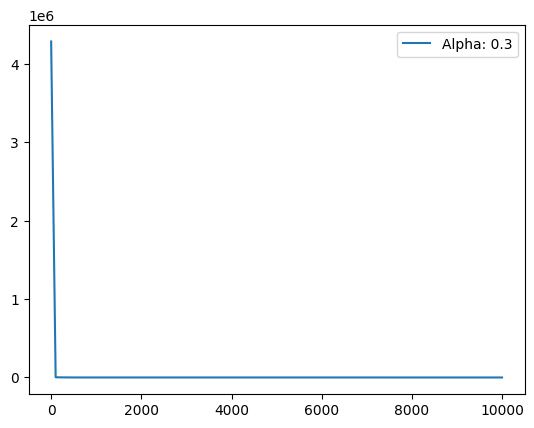

In [72]:
normalized_X_train = z_score_normalization(X_train)
final_W_set, final_b, iteration_history, cost_history = gradient_descent(normalized_X_train, y_train, initial_W_set, initial_b, learning_rate, num_iters)

plt.plot(iteration_history, cost_history, label = f"Alpha: {learning_rate}")
plt.legend()
plt.show()

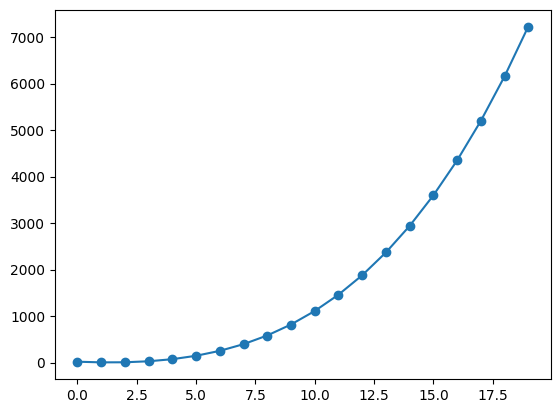

In [73]:
plt.scatter(x_plot, y_plot)
plt.plot(x_plot, normalized_X_train @ final_W_set + final_b)

plt.show()

##### Can do this multiple powers of x - creating more complex functions!

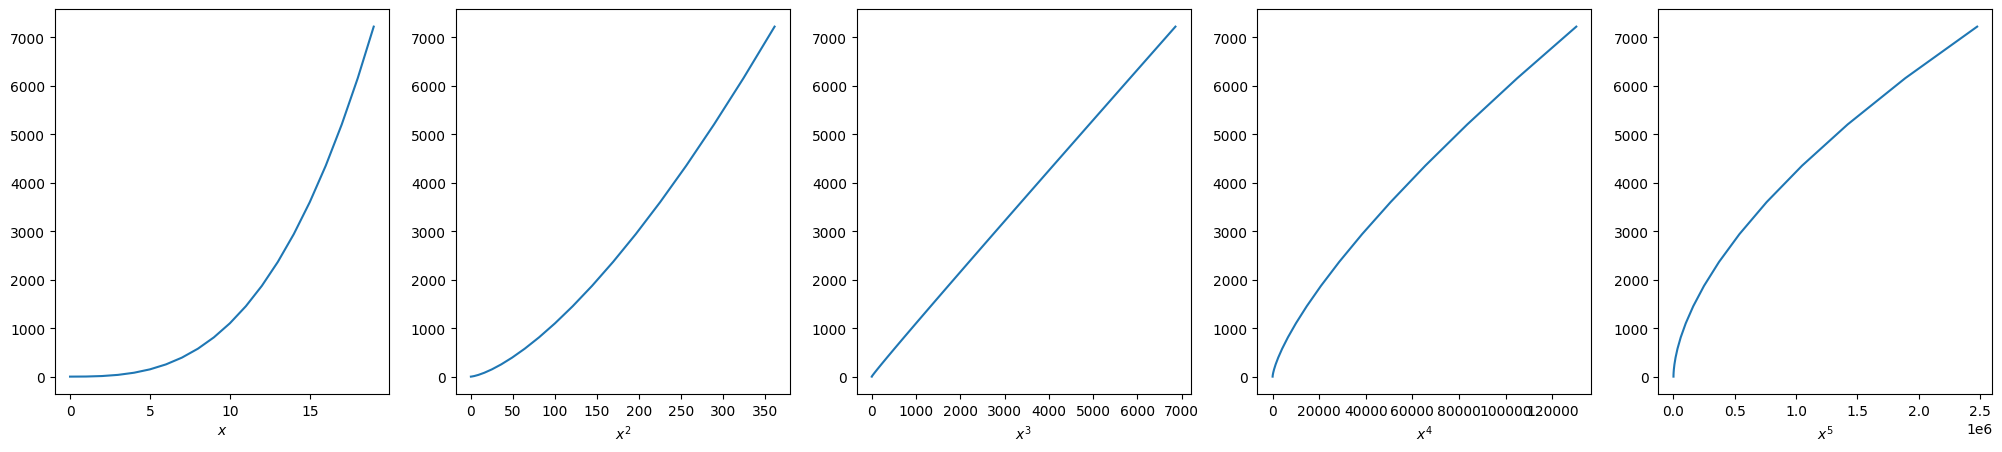

In [74]:
def relative_plot(X_matrix, y_set, feature_names):
    n = X_matrix.shape[1]

    fig, subplots = plt.subplots(1, n, figsize = (n * n, n))
    for feature_index, subplot in enumerate(subplots):
        subplot.plot(X_matrix[:, feature_index], y_set)
        subplot.set_xlabel(feature_names[feature_index])

    plt.show()

relative_plot(X_train, y_train, features)